# Load all libraries necessary for the project 

In [2]:
import os,cv2
import numpy as np
import matplotlib.pyplot as plt

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras import backend as K
K.common.set_image_dim_ordering('th')

from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD,RMSprop,adam, adadelta,Nadam

# Load the dataset

In [3]:
PATH = os.getcwd()
# Define data path
data_path = PATH + '/mask_dataset'
data_dir_list = os.listdir(data_path)

num_channel=1
num_classes = 2
labels_name  = {'mask':0, 'no_mask':1}

img_data_list=[]
labels_list = []

for dataset in data_dir_list:
    img_list=os.listdir(data_path+'/'+ dataset)
    print ('Loading the images of dataset-'+'{}\n'.format(dataset))
    label = labels_name[dataset]
    for img in img_list:
        input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
        input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
        input_img_resize=cv2.resize(input_img,(48,48))
        img_data_list.append(input_img_resize)
        labels_list.append(label)

img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data /= 255
print (img_data.shape)

labels = np.array(labels_list)
# print the count of number of samples for different classes
print(np.unique(labels,return_counts=True))
# convert class labels to on-hot encoding
Y = np_utils.to_categorical(labels, num_classes)

#Shuffle the dataset
x,y = shuffle(img_data,Y, random_state=10)
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10)

if num_channel==1:
    if K.common.image_dim_ordering()=='th':
        img_data= np.expand_dims(img_data, axis=1) 
        print (img_data.shape)
    else:
        img_data= np.expand_dims(img_data, axis=4) 
        print (img_data.shape)

# Defining the model
input_shape=img_data[0].shape
print("***************************")
print(input_shape)
print("***************************")

Loading the images of dataset-mask

Loading the images of dataset-no_mask

(1003, 48, 48)
(array([0, 1]), array([502, 501], dtype=int64))
(1003, 1, 48, 48)
***************************
(1, 48, 48)
***************************


# Apply machine learning (CNN) to the model

In [6]:
num_epoch= 150

model = Sequential()
model.add(Convolution2D(128, (3, 3), activation='relu', input_shape=(1,48,48), data_format='channels_first'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))


model.add(Convolution2D(64, kernel_size=(3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))


model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))

model.add(Dense(num_classes))
model.add(Dropout(0.5))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=["binary_accuracy"]) # adam is the best optimizer

model.summary()
model.get_config()
model.layers[0].get_config()
model.layers[0].input_shape
model.layers[0].output_shape
model.layers[0].get_weights()
np.shape(model.layers[0].get_weights()[0])
model.layers[0].trainable


# Training
X_train = X_train.reshape(X_train.shape[0], 1 ,48 ,48)
X_test = X_test.reshape(X_test.shape[0],1,48,48)

hist = model.fit(X_train, y_train, batch_size=300, epochs=num_epoch, verbose=1, validation_data=(X_test, y_test))


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 128, 46, 46)       1280      
_________________________________________________________________
activation_9 (Activation)    (None, 128, 46, 46)       0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 64, 23, 46)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 64, 23, 46)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 62, 21, 64)        26560     
_________________________________________________________________
activation_10 (Activation)   (None, 62, 21, 64)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 31, 10, 64)       

702/702 [==============================] - 9s 13ms/step - loss: 0.2752 - binary_accuracy: 0.8440 - val_loss: 0.1940 - val_binary_accuracy: 0.9236
Epoch 39/150
702/702 [==============================] - 9s 13ms/step - loss: 0.2802 - binary_accuracy: 0.8362 - val_loss: 0.1857 - val_binary_accuracy: 0.9302
Epoch 40/150
702/702 [==============================] - 9s 13ms/step - loss: 0.2796 - binary_accuracy: 0.8390 - val_loss: 0.1846 - val_binary_accuracy: 0.9269
Epoch 41/150
702/702 [==============================] - 9s 13ms/step - loss: 0.2585 - binary_accuracy: 0.8526 - val_loss: 0.1741 - val_binary_accuracy: 0.9302
Epoch 42/150
702/702 [==============================] - 9s 13ms/step - loss: 0.2633 - binary_accuracy: 0.8519 - val_loss: 0.1828 - val_binary_accuracy: 0.9302
Epoch 43/150
702/702 [==============================] - 9s 13ms/step - loss: 0.2664 - binary_accuracy: 0.8383 - val_loss: 0.1794 - val_binary_accuracy: 0.9601
Epoch 44/150
702/702 [==============================] - 9s 

702/702 [==============================] - 9s 13ms/step - loss: 0.2391 - binary_accuracy: 0.8426 - val_loss: 0.1426 - val_binary_accuracy: 0.9369
Epoch 90/150
702/702 [==============================] - 9s 14ms/step - loss: 0.2333 - binary_accuracy: 0.8454 - val_loss: 0.1012 - val_binary_accuracy: 0.9601
Epoch 91/150
702/702 [==============================] - 9s 13ms/step - loss: 0.2138 - binary_accuracy: 0.8640 - val_loss: 0.1144 - val_binary_accuracy: 0.9668
Epoch 92/150
702/702 [==============================] - 9s 13ms/step - loss: 0.2288 - binary_accuracy: 0.8547 - val_loss: 0.1100 - val_binary_accuracy: 0.9568
Epoch 93/150
702/702 [==============================] - 9s 13ms/step - loss: 0.2075 - binary_accuracy: 0.8647 - val_loss: 0.1109 - val_binary_accuracy: 0.9568
Epoch 94/150
702/702 [==============================] - 9s 13ms/step - loss: 0.1766 - binary_accuracy: 0.8882 - val_loss: 0.1181 - val_binary_accuracy: 0.9601
Epoch 95/150
702/702 [==============================] - 9s 

702/702 [==============================] - 9s 13ms/step - loss: 0.1847 - binary_accuracy: 0.8754 - val_loss: 0.0813 - val_binary_accuracy: 0.9668
Epoch 141/150
702/702 [==============================] - 9s 13ms/step - loss: 0.1898 - binary_accuracy: 0.8675 - val_loss: 0.0917 - val_binary_accuracy: 0.9668
Epoch 142/150
702/702 [==============================] - 9s 13ms/step - loss: 0.1850 - binary_accuracy: 0.8754 - val_loss: 0.0827 - val_binary_accuracy: 0.9701
Epoch 143/150
702/702 [==============================] - 9s 13ms/step - loss: 0.1889 - binary_accuracy: 0.8704 - val_loss: 0.0844 - val_binary_accuracy: 0.9668
Epoch 144/150
702/702 [==============================] - 9s 13ms/step - loss: 0.1883 - binary_accuracy: 0.8697 - val_loss: 0.0825 - val_binary_accuracy: 0.9734
Epoch 145/150
702/702 [==============================] - 9s 13ms/step - loss: 0.1708 - binary_accuracy: 0.8811 - val_loss: 0.0888 - val_binary_accuracy: 0.9734
Epoch 146/150
702/702 [==============================]

# Plot the graph between both the losses and both the accuracy

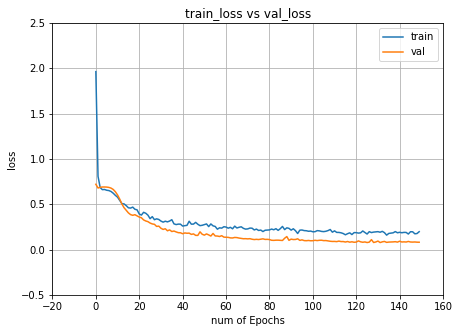

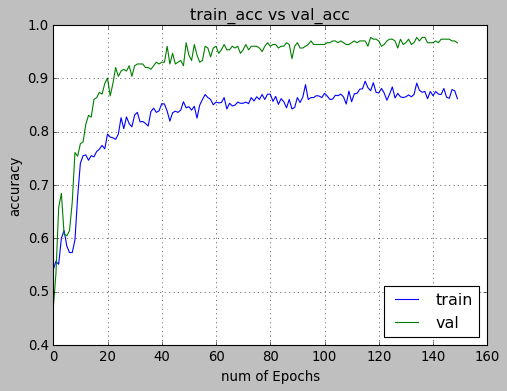

In [7]:
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['binary_accuracy']
val_acc=hist.history['val_binary_accuracy']
xc=range(num_epoch)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])


# Plot the confusion matrix

                  precision    recall  f1-score   support

   class 0(mask)       0.96      0.96      0.96       141
class 1(no_mask)       0.97      0.97      0.97       160

        accuracy                           0.97       301
       macro avg       0.97      0.97      0.97       301
    weighted avg       0.97      0.97      0.97       301

[[136   5]
 [  5 155]]
Confusion matrix, without normalization
[[136   5]
 [  5 155]]


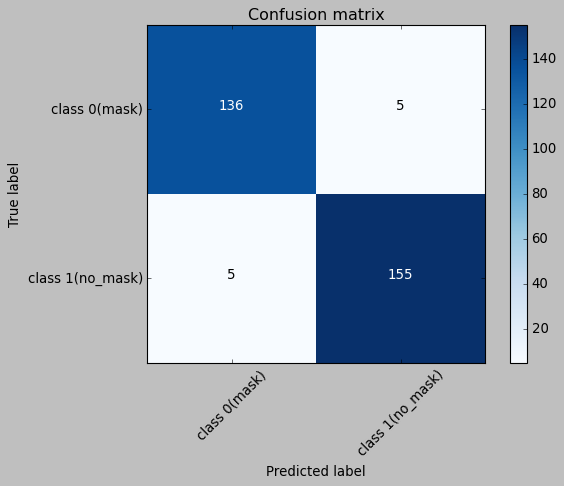

In [8]:
from sklearn.metrics import classification_report,confusion_matrix
import itertools

Y_pred = model.predict(X_test)
#print(Y_pred)
y_pred = np.argmax(Y_pred, axis=1)
#print(y_pred)
y_pred = model.predict_classes(X_test)
#print(y_pred)
target_names = ['class 0(mask)','class 1(no_mask)'] 
print(classification_report(np.argmax(y_test,axis=1), y_pred,target_names=target_names))

print(confusion_matrix(np.argmax(y_test,axis=1), y_pred))


# Plotting the confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    #plt.figure(1,figsize=(7,5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = (confusion_matrix(np.argmax(y_test,axis=1), y_pred))

np.set_printoptions(precision=2)

plt.figure()

# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=target_names,
                      title='Confusion matrix')

plt.show()


# Save the model

In [9]:
from keras.models import model_from_json
from keras.models import load_model

# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

model.save('model.hdf5')
loaded_model=load_model('model.hdf5')


Saved model to disk
Loaded model from disk


# Import the save model and predict the images

In [10]:
# import save model

import cv2
import numpy as np
from keras.models import load_model
from sklearn.metrics import classification_report,confusion_matrix
from keras.models import Sequential
from keras.models import model_from_json
from keras import backend as K
K.common.set_image_dim_ordering('th')
from sklearn.metrics import classification_report,confusion_matrix
import itertools


model = Sequential()

num_channel=1

# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")
loaded_model=load_model('model.hdf5')

test_image = cv2.imread('dataset/s.jpg')
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
test_image = cv2.resize(test_image,(48,48))
test_image = np.array(test_image)
test_image = test_image.astype('float32')
test_image /= 255
print (test_image.shape)
   
if num_channel==1:
    if K.common.image_dim_ordering()=='th':
        test_image= np.expand_dims(test_image, axis=0)
        test_image= np.expand_dims(test_image, axis=0)
        print (test_image.shape)
    else:
        test_image= np.expand_dims(test_image, axis=3) 
        test_image= np.expand_dims(test_image, axis=0)
        print (test_image.shape)

lst =[0 ,1]

labels_name  = {'mask':0, 'no_mask':1 }
name_list = list(labels_name.keys()) 
val_list = list(labels_name.values())

for pict in lst:
    if(loaded_model.predict_classes(test_image) == pict):
        print(loaded_model.predict_classes(test_image),"==========>",name_list[val_list.index(pict)]) 
        

Loaded model from disk
(48, 48)
(1, 1, 48, 48)
[0] ==========> mask


# Import the save model and apply in real time

In [2]:
import cv2
import numpy as np
from keras.models import load_model
from keras.models import Sequential
from keras.models import model_from_json
from keras import backend as K
K.common.set_image_dim_ordering('th')
import itertools


model = Sequential()
num_channel=1
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")
loaded_model=load_model('model.hdf5')

faceCascade = cv2.CascadeClassifier('haarcascade/haarcascade_frontalface_default.xml')
video_capture = cv2.VideoCapture(0)

index_id = ['MASK', 'WITHOUT MASK']

while True:

    ret, frame = video_capture.read()
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    if ret == True:

            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            faces = faceCascade.detectMultiScale(
                gray,
                scaleFactor=1.3,
                minNeighbors=6,
                minSize=(10, 10),  #  size of face  (move far the size of face decreases)
                flags=cv2.CASCADE_SCALE_IMAGE
            )

            # Draw a rectangle around the faces
            for (x, y, w, h) in faces:
                #cv2.rectangle(frame, (x, y-20), (x+w, y+h+10), (255, 0, 0),2)
                roi_gray_frame = gray_frame[y:y + h, x:x + w]                
                img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray_frame, (48, 48)),0), 0) 
                mask_detection = loaded_model.predict(img)
                index = int(np.argmax(mask_detection))
                print("index = ",index)
                if index == 0:
                    cv2.rectangle(frame, (x, y-20), (x+w, y+h+10), (0, 255, 255),3)    
                    cv2.putText(frame,"SAFE ", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 0, 102), 2, cv2.LINE_AA)
                else:
                    cv2.rectangle(frame, (x, y-20), (x+w, y+h+10), (0, 0, 255),3)
                    cv2.putText(frame,"WARNING!! WEAR FACE MASK,COVID IS THERE ", (8, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 0, 102), 2, cv2.LINE_AA)
                cv2.putText(frame, index_id[index], (x+10, y-40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)
                
            # Display the resulting frame
            cv2.imshow('Video', frame)
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break

# When everything is done, release the capture
video_capture.release()
cv2.destroyAllWindows()

Loaded model from disk


KeyboardInterrupt: 